# 2. Apply Decision tree and random algorithm on attrition dataset with DV as Attrition and choose the proper IDV using Random forest.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

## Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading attrition dataset
attrition_train = pd.read_csv("dataset/general_data.csv")

In [4]:
attrition_train.head().T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,Female,Female,Male,Male,Male


In [5]:
# Variables in attrition dataset
attrition_train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Finding null values
attrition_train.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
# Handling null values
attrition_train["NumCompaniesWorked"].fillna(value=0, inplace=True)
attrition_train["TotalWorkingYears"].fillna(value=0, inplace=True)
attrition_train.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [8]:
labelencoder = preprocessing.LabelEncoder()

In [9]:
attrition_train['BusinessTravel'] = labelencoder.fit_transform(attrition_train['BusinessTravel'])
attrition_train['Department']     = labelencoder.fit_transform(attrition_train['Department'])
attrition_train['EducationField'] = labelencoder.fit_transform(attrition_train['EducationField'])
attrition_train['Gender']         = labelencoder.fit_transform(attrition_train['Gender'])
attrition_train['JobRole']        = labelencoder.fit_transform(attrition_train['JobRole'])
attrition_train['MaritalStatus']  = labelencoder.fit_transform(attrition_train['MaritalStatus'])
attrition_train['Attrition']      = labelencoder.fit_transform(attrition_train['Attrition'])
attrition_train.head().T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,0,1,0,0,0
BusinessTravel,2,1,1,0,2
Department,2,1,1,1,1
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,1,1,4,1,3
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,0,0,1,1,1


In [10]:
# Initialising random forest model
rf_model = RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [11]:
features=["Gender","Age","BusinessTravel","Department","DistanceFromHome","Education","EducationField","JobLevel","JobRole","MaritalStatus",
         "MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear",
         "YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]

In [12]:
rf_model.fit(X=attrition_train[features],y=attrition_train["Attrition"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
print("OOB Accuracy:", rf_model.oob_score_)

OOB Accuracy: 0.9997732426303855


In [14]:
# To find important features
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Gender 0.018460077146613282
Age 0.09617942336466745
BusinessTravel 0.028561545837404674
Department 0.025922236984737557
DistanceFromHome 0.06912917926141443
Education 0.040769769926303503
EducationField 0.041899403441581926
JobLevel 0.03720557824066145
JobRole 0.054816178428823296
MaritalStatus 0.03965796850237859
MonthlyIncome 0.09474170967641588
NumCompaniesWorked 0.05630445289361368
PercentSalaryHike 0.0652466072149753
StockOptionLevel 0.033929874070593224
TotalWorkingYears 0.08618143438186678
TrainingTimesLastYear 0.04541312369779222
YearsAtCompany 0.06932922939349319
YearsSinceLastPromotion 0.04361065247962005
YearsWithCurrManager 0.05264155505704355


### Most important features are Age, MonthlyIncome and TotalWorkingYears

## Creating Decision Tree Model

In [15]:
# Initialising Decision Tree
tree_model = tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)
# tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [16]:
predictors = pd.DataFrame([attrition_train["Age"],attrition_train["MonthlyIncome"], attrition_train["TotalWorkingYears"]]).T

In [17]:
# Model created
tree_model.fit(X=predictors,y=attrition_train["Attrition"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
with open("Dtree_Attrition.dot","w") as f:
    f = tree.export_graphviz(tree_model,feature_names=["Age","MonthlyIncome","TotalWorkingYears"],out_file=f)

In [19]:
# Model accuracy
tree_model.score(X=predictors,y=attrition_train["Attrition"])

0.8578231292517007

## Decision Tree

In [20]:
text_representation = tree.export_text(tree_model,feature_names=["Age","MonthlyIncome","TotalWorkingYears"])
print(text_representation)

|--- TotalWorkingYears <= 1.50
|   |--- Age <= 33.50
|   |   |--- MonthlyIncome <= 112610.00
|   |   |   |--- MonthlyIncome <= 23140.00
|   |   |   |   |--- class: 0
|   |   |   |--- MonthlyIncome >  23140.00
|   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  23.50
|   |   |   |   |   |--- MonthlyIncome <= 32530.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- MonthlyIncome >  32530.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- MonthlyIncome >  112610.00
|   |   |   |--- class: 0
|   |--- Age >  33.50
|   |   |--- class: 0
|--- TotalWorkingYears >  1.50
|   |--- Age <= 33.50
|   |   |--- class: 0
|   |--- Age >  33.50
|   |   |--- TotalWorkingYears <= 39.00
|   |   |   |--- MonthlyIncome <= 10300.00
|   |   |   |   |--- class: 1
|   |   |   |--- MonthlyIncome >  10300.00
|   |   |   |   |--- class: 0
|   |   |--- TotalWorkingYears >  39.00
|   |   |   |--- class: 1



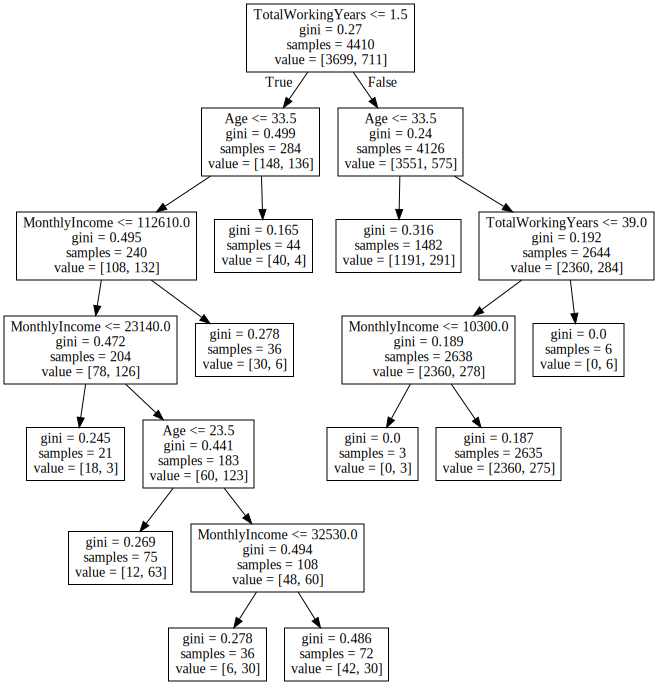

In [21]:
graph = Source(tree.export_graphviz(tree_model,feature_names=["Age","MonthlyIncome","TotalWorkingYears"],out_file=f))

display(SVG(graph.pipe(format='svg')))